In [12]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
####### CLASSIFICATON ##########
from pycaret.classification import *

In [5]:
clf = setup(df, target='Survived')

,Description,Value
0,session_id,247
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8428,0.8161,0.7184,0.8295,0.7671,0.6498,0.6558,0.0210
lr,Logistic Regression,0.8412,0.8835,0.7405,0.8062,0.7711,0.6500,0.6521,0.8870
lightgbm,Light Gradient Boosting Machine,0.8348,0.8770,0.7494,0.7959,0.7666,0.6393,0.6451,0.0950
gbc,Gradient Boosting Classifier,0.8332,0.8814,0.6528,0.8585,0.7383,0.6198,0.6344,0.1060
ridge,Ridge Classifier,0.8316,0.0000,0.7360,0.7870,0.7562,0.6286,0.6331,0.0270
catboost,CatBoost Classifier,0.8315,0.8870,0.6569,0.8595,0.7345,0.6159,0.6342,1.0950
xgboost,Extreme Gradient Boosting,0.8284,0.8706,0.7364,0.7867,0.7573,0.6250,0.6289,0.6810
rf,Random Forest Classifier,0.8171,0.8718,0.7012,0.7815,0.7344,0.5960,0.6019,0.1480
ada,Ada Boost Classifier,0.8058,0.8638,0.6751,0.7725,0.7162,0.5701,0.5767,0.0580
et,Extra Trees Classifier,0.8042,0.8658,0.6968,0.7528,0.7201,0.5703,0.5744,0.1370


In [7]:
catboost_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8652,0.6522,0.8824,0.7500,0.6375,0.6531
1,0.8571,0.8745,0.6522,0.9375,0.7692,0.6705,0.6937
2,0.7778,0.8342,0.5217,0.8000,0.6316,0.4824,0.5050
3,0.8065,0.8648,0.6818,0.7500,0.7143,0.5684,0.5699
4,0.7903,0.8580,0.4091,1.0000,0.5806,0.4718,0.5557
5,0.9032,0.9565,0.7826,0.9474,0.8571,0.7850,0.7932
6,0.8387,0.9197,0.6957,0.8421,0.7619,0.6416,0.6483
7,0.7903,0.8740,0.6957,0.7273,0.7111,0.5467,0.5470
8,0.8871,0.9532,0.8696,0.8333,0.8511,0.7602,0.7607
9,0.8226,0.8701,0.6087,0.8750,0.7179,0.5945,0.6154


In [8]:
tuned_model = tune_model(catboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8804,0.6522,0.8333,0.7317,0.6051,0.6151
1,0.8413,0.8337,0.6087,0.9333,0.7368,0.6303,0.6598
2,0.8095,0.8087,0.6087,0.8235,0.7000,0.5650,0.5789
3,0.8387,0.8682,0.7727,0.7727,0.7727,0.6477,0.6477
4,0.7742,0.8432,0.5455,0.7500,0.6316,0.4746,0.4871
5,0.9194,0.9610,0.8696,0.9091,0.8889,0.8256,0.8261
6,0.8548,0.9231,0.7391,0.8500,0.7907,0.6804,0.6843
7,0.8226,0.8618,0.7391,0.7727,0.7556,0.6164,0.6168
8,0.9032,0.9398,0.8261,0.9048,0.8636,0.7889,0.7908
9,0.8710,0.8757,0.7391,0.8947,0.8095,0.7133,0.7207


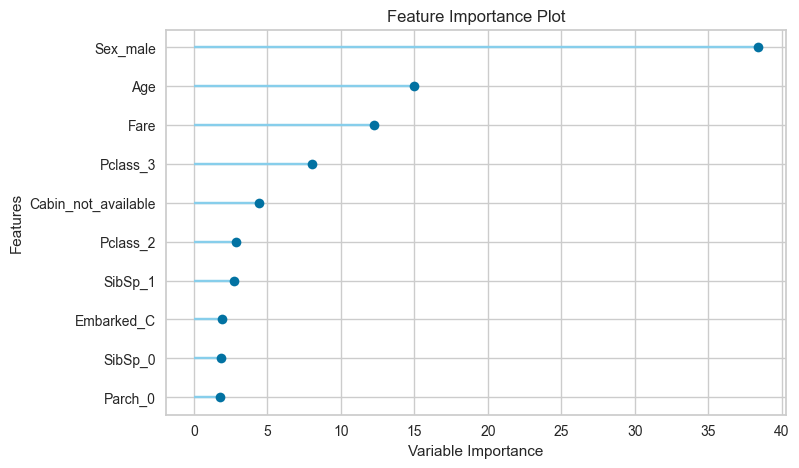

In [10]:
plot_model(tuned_model, plot='feature')

<AxesSubplot:>

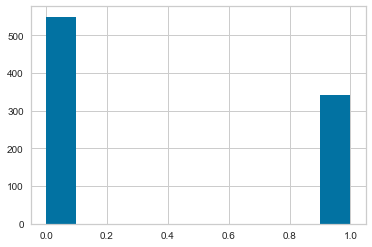

In [13]:
df['Survived'].hist()

In [16]:
df['Age'].isna().sum()

177

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
clf = setup(df, target='Survived', fix_imbalance = True, 
            imputation_type='iterative', 
            numeric_iterative_imputer='lightgbm', feature_interaction=True)

,Description,Value
0,session_id,905
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8397,0.8689,0.7351,0.8223,0.7735,0.6503,0.6550,19.0190
et,Extra Trees Classifier,0.8316,0.8630,0.7221,0.8132,0.7632,0.6332,0.6375,1.0310
rf,Random Forest Classifier,0.8253,0.8535,0.7310,0.7911,0.7581,0.6218,0.6247,0.8910
gbc,Gradient Boosting Classifier,0.8253,0.8728,0.7350,0.7893,0.7569,0.6214,0.6256,2.6490
dt,Decision Tree Classifier,0.8188,0.8010,0.7306,0.7792,0.7508,0.6089,0.6126,0.7330
ada,Ada Boost Classifier,0.8043,0.8464,0.7141,0.7579,0.7306,0.5776,0.5826,1.1300
lr,Logistic Regression,0.8026,0.8300,0.7047,0.7493,0.7242,0.5713,0.5736,14.5900
lightgbm,Light Gradient Boosting Machine,0.7931,0.8394,0.6886,0.7531,0.7129,0.5524,0.5596,1.0330
xgboost,Extreme Gradient Boosting,0.7866,0.8504,0.7007,0.7342,0.7116,0.5429,0.5486,7.2010
ridge,Ridge Classifier,0.7786,0.0000,0.6670,0.7223,0.6878,0.5181,0.5236,0.7020


In [22]:
et = create_model('et')
rf = create_model('rf')
adaboost = create_model('gbc')
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8376,0.6667,0.7619,0.7111,0.5517,0.5547
1,0.8571,0.8761,0.8333,0.8000,0.8163,0.6995,0.6999
2,0.7460,0.7879,0.6250,0.6818,0.6522,0.4528,0.4538
3,0.8548,0.9064,0.7826,0.8182,0.8000,0.6862,0.6866
4,0.8871,0.8740,0.7826,0.9000,0.8372,0.7514,0.7557
5,0.8387,0.8406,0.6957,0.8421,0.7619,0.6416,0.6483
6,0.8710,0.9353,0.8261,0.8261,0.8261,0.7235,0.7235
7,0.8871,0.8868,0.7826,0.9000,0.8372,0.7514,0.7557
8,0.8065,0.8227,0.5652,0.8667,0.6842,0.5534,0.5797
9,0.8548,0.9211,0.7917,0.8261,0.8085,0.6917,0.6921


In [24]:
blender_specific = blend_models(estimator_list = [et,rf,adaboost,catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8697,0.7083,0.7727,0.7391,0.5896,0.5910
1,0.8413,0.8632,0.7917,0.7917,0.7917,0.6635,0.6635
2,0.7460,0.7762,0.6250,0.6818,0.6522,0.4528,0.4538
3,0.8710,0.8952,0.7826,0.8571,0.8182,0.7185,0.7203
4,0.9032,0.8785,0.7826,0.9474,0.8571,0.7850,0.7932
5,0.8226,0.8551,0.6957,0.8000,0.7442,0.6094,0.6129
6,0.9194,0.9320,0.8696,0.9091,0.8889,0.8256,0.8261
7,0.8710,0.8757,0.7391,0.8947,0.8095,0.7133,0.7207
8,0.7581,0.8272,0.5217,0.7500,0.6154,0.4471,0.4628
9,0.8548,0.9123,0.7917,0.8261,0.8085,0.6917,0.6921


In [ ]:
tuned = tune_model(blender_specific)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:27:46
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
